<a href="https://colab.research.google.com/github/StephanieO-jpg/Hypothyroid-prediction-in-patients/blob/master/Supervised_Learning_with_Decision_Trees_%26_SVM_for_Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hypothyroidism : A case study on Nairobi Hospital patients

<img src "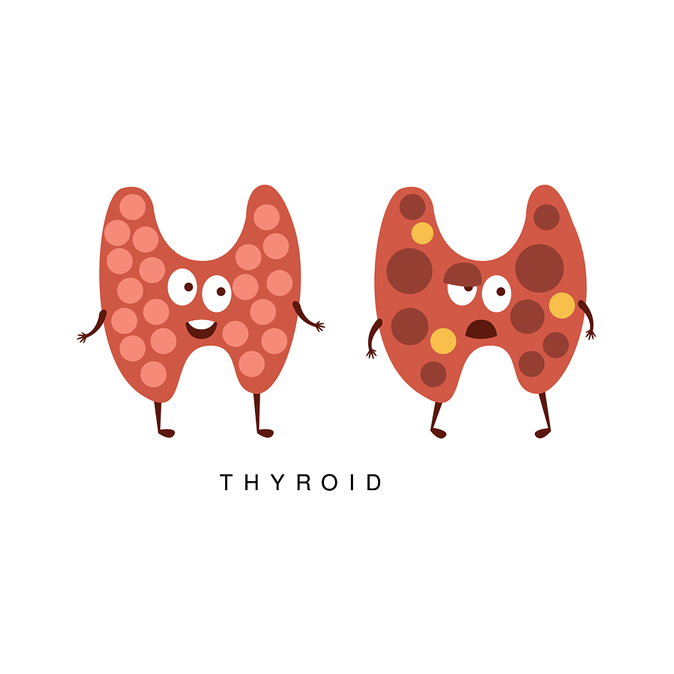" width="200"/>


 
 > Hypothyroidism , (also underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of thyroid hormones. The hormone's main job is to run the body's metabolism. Hypothyrodism is more common than you know, in fact a lot of people are living with thyroid hormone deficiency hence the need to take on this case study.


> The Nairobi Hospital stands out as one of the nation’s top Hospital, attracting talented faculty, staff , superb clinical affiliates and global outlook. They conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients and I have been tasked to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.


# 1. Define the question

# a) Specifying the Question

I am to build a model that makes the above prediction. I should not use individual decision trees, rather I should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction.Clean the data a little bit so as to make sense of the features.Document what transformation you've done on the data.
Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step. After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version.

# b) Define the Metric of Success

# c) Understand the context

BELOW ARE THE COLUMNS FOUND WITHIN THE DATASET FOR BETTER UNDERSTANDING OF THE DATA 
Dataset Columns

* Age
* Sex
* on_thyroxine
* query_on_thyroxine
* on_antithyroid_medicationthyroid_surgery
* query_hypothyroid
* query_hyperthyroid
* pregnant
* sick
* tumor
* lithium
* goitre
* TSH_measured
* TSH
* T3_measured
* T3
* TT4_measured
* TT4




* >  Thyroxine is a hormone secreted by the thryoid gland and plays a crucial role in heart and digestive function, metabolism, brain development, bone health, and muscle control. It affects almost all of the body's systems, which means proper thyroxine levels are vital for health. This is why many doctors will test T4 levels along with the more common T3 levels when testing for thyroid disorders.

* > the query_hypothyroid column shows the number of patients who's thyroid glands are unaderactive.
* > query_hyperthyroid shows the number of patients who's thyroid gland is overactive.
* > lithium shows the number of patients who have lithium in them, a component that can cause goitre and hypothyroidsm.
* > goitre shows the number of people with either under or overactive thyroid glands.
* > TSH measured is a test taken to find out whether the thyroid gland is working the way it should.
* > TSH is a test used to find out the amount of thyroxine produces.
* > T3 & T4 are the major hormones produced by the thyroid glands. Normal T3 ranges from 4.6 to 11.2. Normal T4 should range from 5.0 to 12.0








# d) Record the experimental design

# e) Data Relevance

# Reading the data

In [0]:
# importing libraries needed for that analysis
import pandas as pd
# allows us to read our files and organize them in tabular form
import numpy as np
# numpy allows us to work with multi dimensional arrays
import scipy
# scipy-a python ecosystem used for mathematics, machine learning 
import matplotlib.pyplot as plt
# matplotlib - a 2D library used to plot numpy computations
import seaborn as sns
# seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
import sklearn
# sklearn-used for machine learning, 
%matplotlib inline
# for visualization 
import statsmodels.api as sm
# statsmodel-used to run regression


In [2]:
# previewing the dataset

url = 'https://ia803101.us.archive.org/3/items/hypothyroid/hypothyroid.csv'

med = pd.read_csv (url)
med.take(np.random.permutation(len(med))[:15])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2811,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,3.60,y,1.50,y,107,y,0.72,y,147,n,?
1947,negative,46,M,f,f,f,f,f,t,f,f,f,f,f,n,?,n,?,n,?,n,?,n,?,y,27
1201,negative,41,F,f,f,f,f,f,f,f,f,f,f,f,y,0.20,y,1.20,y,86,y,0.75,y,116,n,?
1095,negative,71,F,f,f,f,f,f,f,f,f,f,f,f,y,0.50,y,1.80,y,99,y,0.91,y,108,n,?
1628,negative,62,M,f,t,f,f,f,f,f,f,f,f,f,y,4.60,n,?,y,135,y,1.02,y,132,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
1043,negative,70,F,f,f,f,f,t,f,f,f,f,f,f,y,3.70,n,?,y,69,y,0.83,y,83,n,?
2609,negative,43,M,t,f,f,t,f,f,f,f,f,f,f,y,1.60,y,1.40,y,101,y,0.70,y,144,n,?
1073,negative,60,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,2,y,130,y,1.01,y,129,n,?
377,negative,70,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,2.10,y,96,y,1,y,96,n,?


In [3]:
# checking on the shape of the dataset
med.shape

(3163, 26)

In [4]:
# getting information on the dataset
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

In [5]:
# getting a description on the dataset
med.describe().transpose()

,count,unique,top,freq
status,3163,2,negative,3012
age,3163,93,?,446
sex,3163,3,F,2182
on_thyroxine,3163,2,f,2702
query_on_thyroxine,3163,2,f,3108
on_antithyroid_medication,3163,2,f,3121
thyroid_surgery,3163,2,f,3059
query_hypothyroid,3163,2,f,2922
query_hyperthyroid,3163,2,f,2920
pregnant,3163,2,f,3100






*   The unique values report represents the cardinality of the features. The following columns TSH, TT4, T4U and FTI have a large number of unique values hence high cardinality. In comparison to the number of columns we will ignore the cardinality as the cardinality in relation to the number of columns is low meaning the columns provide a variation of values hence we can gain information from these columns
*   The report represents the value of the mode of each feature while the frequency report gives the number of times this values occurs.


*   We notice the presence of question marks(?) across a number of columns(namely : age, T3, TT4, T4U, FTI, TBG) to represent missing values in the dataset








# Cleaning 

This is where we rectify our dataset before exploring and analysing the data

In [6]:
# obtaining the datatype for each column

med.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
# convert the dataset into categorical data
med.astype('category').head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [0]:
# changing numeric columns to numeric data types
med[['age','TSH','T3','TT4','T4U','FTI']] = med[['age','TSH','T3','TT4','T4U','FTI']].apply(pd.to_numeric, errors='coerce')

In [9]:
med.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                           object
dtype: object

In [0]:
# changing sex column to lower case 
med['sex'] = med['sex'].str.lower()

In [11]:
# checking for any duplicates
med.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
3158    False
3159    False
3160    False
3161    False
3162    False
Length: 3163, dtype: bool

In [12]:
med.duplicated().sum()

77

In [13]:

# Select duplicate rows except first occurrence based on all columns
duplicateRows = med[med.duplicated()]
 
print("Duplicated Rows except first occurrence based on all columns are :")
print(duplicateRows)

Duplicated Rows except first occurrence based on all columns are :
           status   age sex on_thyroxine  ... FTI_measured    FTI TBG_measured TBG
53    hypothyroid  69.0   f            f  ...            y   61.0            n   ?
66    hypothyroid  62.0   m            f  ...            y   10.0            n   ?
124   hypothyroid  77.0   f            f  ...            y   49.0            n   ?
128   hypothyroid  79.0   f            f  ...            y   48.0            n   ?
131   hypothyroid  50.0   f            t  ...            y   60.0            n   ?
...           ...   ...  ..          ...  ...          ...    ...          ...  ..
3048     negative  28.0   m            f  ...            y  103.0            n   ?
3055     negative  33.0   f            f  ...            y   86.0            n   ?
3066     negative  74.0   f            t  ...            y  107.0            n   ?
3111     negative  89.0   m            f  ...            y  103.0            n   ?
3151     negative  5

In [0]:
# dropping the duplicated data

med.drop_duplicates(inplace=True)

In [15]:
med.duplicated().sum()

0

In [16]:
# checking for null values
med.isnull().sum()

status                         0
age                          438
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
TSH_measured                   0
TSH                          455
T3_measured                    0
T3                           680
TT4_measured                   0
TT4                          240
T4U_measured                   0
T4U                          239
FTI_measured                   0
FTI                          238
TBG_measured                   0
TBG                            0
dtype: int64

In [17]:
# listing unique values in each column
# We will use a for loop to iterate through the different columns
for columns in med.columns:
    print('/n')
    print(med[columns].unique())

/n
['hypothyroid' 'negative']
/n
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]
/n
['m' 'f' '?']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['f' 't']
/n
['y' 'n']
/n
[3.00e+01 1.45e+02 0.00e+00 4.30e+02 7.30e+00 1.38e+02 7.70e+00 2.10e+01
 9.20e+01 4.80e+01 3.60e+01 1.50e+01 1.53e+01 2.50e+01 6.10e+01 2.80e+01
 1.70e+02 5.40e+01 2.16e+02 5.60e+01 7.10e+01 4.60e+01 7.00e+01 3.40e+01
 5.30e+01 9.40e+00 1.26e+02 1.00e+01 5.30e+02 3.50e+01 6.50e+01 5.70e+01
 1.25e+02 2.30e+01 8.00e+01 1.17e+02 4.90e+01 6.60e+01 8.20e+00 1.50e+02
      nan 1.80e+01 1.65e+02 1.64e+02 2.40e+01 9

It has been noted that some values appear to be in form of a question mark, we will assume that they are null values and replace it with nan

In [18]:
# replacing the question marks within the dataset
med = med.replace(['?'],np.nan)
med.take(np.random.permutation(len(med))[:15])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
1821,negative,NaN,f,f,f,f,f,f,f,f,f,f,f,f,y,0.90,n,NaN,y,70.0,y,0.80,y,87.0,n,NaN
1688,negative,59.0,f,f,f,f,f,f,f,f,f,f,f,f,n,NaN,n,NaN,n,NaN,n,NaN,n,NaN,y,25
287,negative,54.0,f,t,f,f,f,f,f,f,f,f,f,f,y,0.00,y,1.6,y,111.0,y,0.71,y,158.0,n,NaN
290,negative,84.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.00,y,1.0,y,97.0,y,0.84,y,115.0,n,NaN
663,negative,NaN,m,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.0,y,46.0,y,0.66,y,70.0,n,NaN
2902,negative,60.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.91,y,1.0,y,102.0,y,0.91,y,112.0,n,NaN
1672,negative,55.0,m,f,f,f,f,f,f,f,f,f,f,f,y,1.60,y,0.9,y,79.0,y,0.90,y,88.0,n,NaN
2352,negative,64.0,m,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,2.1,y,82.0,y,0.96,y,85.0,n,NaN
2949,negative,70.0,f,t,f,f,f,f,f,f,f,f,f,f,y,1.60,y,1.8,y,175.0,y,1.18,y,148.0,n,NaN
440,negative,63.0,f,f,f,f,t,f,f,f,f,f,f,f,y,8.20,y,2.1,y,80.0,y,1.01,y,79.0,n,NaN


Because we have already dealt with the first set of null values and we dont know why there were question marks in the dataset, we will replace them with most appearing (mode)

In [19]:
# filling the newly formed NaNs with mode
for column in med.columns:
    med[column].fillna(med[column].mode()[0],inplace=True)
    
med.take(np.random.permutation(len(med))[:15])    

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
1560,negative,63.0,f,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.6,y,99.0,y,0.93,y,106.0,n,21
938,negative,60.0,f,f,f,f,f,t,f,f,f,f,f,f,y,0.1,y,2.6,y,206.0,y,1.12,y,184.0,n,21
2414,negative,59.0,f,f,f,f,f,f,t,f,f,f,f,f,y,0.0,y,1.8,y,121.0,y,1.00,y,121.0,n,21
2221,negative,58.0,m,t,f,f,f,f,f,f,f,f,f,f,y,1.2,n,1.6,y,119.0,y,0.86,y,139.0,n,21
647,negative,28.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.9,y,103.0,y,0.84,y,123.0,n,21
998,negative,56.0,f,f,f,f,f,f,f,f,f,f,f,f,n,0.0,n,1.6,y,77.0,y,1.08,y,71.0,n,21
65,hypothyroid,65.0,f,f,f,f,f,f,f,f,f,f,f,f,y,213.0,y,0.9,y,43.0,y,0.95,y,45.0,n,21
81,hypothyroid,62.0,m,f,f,f,f,f,f,f,f,f,f,f,y,54.0,y,0.6,y,41.0,y,0.78,y,52.0,n,21
1635,negative,64.0,m,f,f,f,t,f,f,f,f,f,f,f,y,5.6,y,2.2,y,114.0,y,1.11,y,103.0,n,21
1823,negative,60.0,f,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.4,y,59.0,y,0.64,y,92.0,n,21


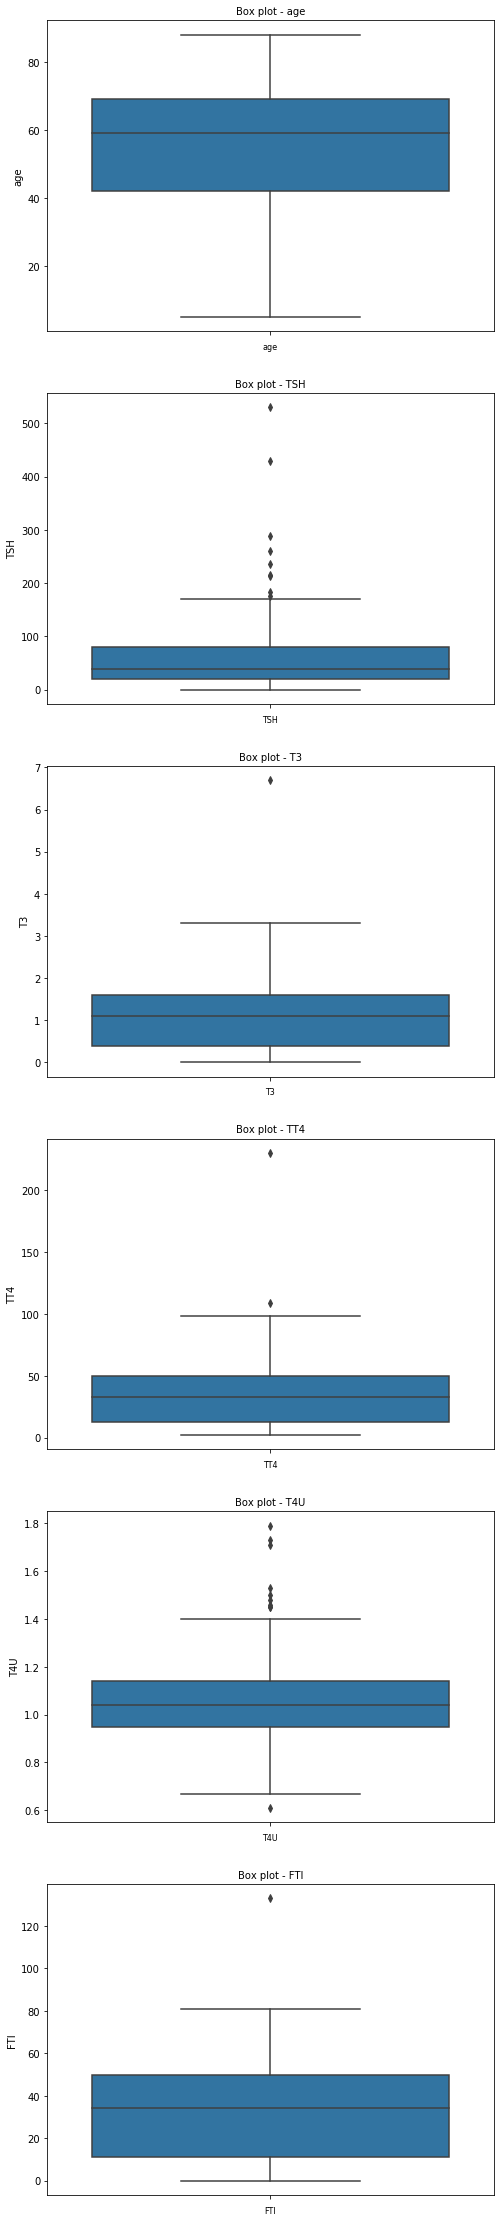

In [31]:
# checking for outliers in the numerical columns
columns=['age','TSH','T3','TT4','T4U','FTI']
fig, ax = plt.subplots(len(columns), figsize=(8,40))
for i, values in enumerate(columns):

    sns.boxplot(y=med[values], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(values), fontsize=10)
    ax[i].set_xlabel(values, fontsize=8)
plt.show()

# Exploratory Data Analysis (Univariate,Bivariate and Multivariate Analysis)

## Univariate Analysis

### Non - graphical Analysis

Here we will carry out the following computations :


*   Measures of central tendancies : Mean, mode and median for numerical data and Mode for categorical data


*   Measures of dispersion











### Measures of central tendancy







In [47]:
# Calculating the mean of the numeric features
numeric = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
for col in numeric:
  print(med[[col]].mean())

age    54.397163
dtype: float64
TSH    65.187943
dtype: float64
T3    1.170213
dtype: float64
TT4    35.11773
dtype: float64
T4U    1.061915
dtype: float64
FTI    33.240426
dtype: float64
TBG    1.504406e+279
dtype: float64


In [48]:
# Determining the mode of each of the numeric features

for col in numeric:
  print(med[[col]].mode())

    age
0  59.0
    TSH
0  30.0
    T3
0  0.4
    TT4
0   4.0
1  10.0
    T4U
0  0.95
   FTI
0  0.0
  TBG
0  21


TT4 is a bimodal feature having the mode values 4.0 and 10.0


In [49]:
# Identifying the median 

for col in numeric:
  print(med[[col]].median())

age    59.0
dtype: float64
TSH    38.0
dtype: float64
T3    1.1
dtype: float64
TT4    33.0
dtype: float64
T4U    1.04
dtype: float64
FTI    34.0
dtype: float64
TBG    21.0
dtype: float64


### Measures of Dispersion

In [53]:
# The InterQuartile Range (IQR)
# IQR is also called the midspread or middle 50%

# Calculating IQR for the numeric features



for i in numeric:

  Q1 = med[i].quantile(0.25)
  Q3 = med[i].quantile(0.75)
  IQR = Q3 - Q1
  print(i, ':', IQR)

age : 27.0
TSH : 60.0
T3 : 1.2000000000000002
TT4 : 37.0
T4U : 0.18999999999999995
FTI : 39.0


TypeError: ignored

### Graphical analysis

This section entails visualizations of the data

In [24]:
# grouping the patients by their health status so as to distinguish between those who are healthy and those with hypothyroidsm

med.groupby('status').count()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
status,,,,,,,,,,,,,,,,,,,,,,,,,
hypothyroid,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141
negative,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945,2945


In [26]:
# grouping the patients according to their sexual orientation to determine the number of males and females recorded 
sex = med.groupby('sex').count()
sex.head()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
sex,,,,,,,,,,,,,,,,,,,,,,,,,
f,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192,2192
m,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894,894


Number of females patients tested for hypothyroid are more than the males

In [34]:
# grouping the patients with hypothyroid
medz = med[med['status'] == "hypothyroid"].sort_values(['age'], ascending=True)
medz.take(np.random.permutation(len(med))[:15])

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
32,hypothyroid,50.0,f,t,f,f,f,f,f,f,f,f,f,f,y,34.0,n,1.6,y,55.0,y,0.93,y,60.0,n,21
149,hypothyroid,30.0,f,t,f,f,f,f,f,f,f,f,f,f,y,41.0,y,3.0,y,109.0,y,1.79,y,61.0,n,21
102,hypothyroid,44.0,m,f,f,f,f,f,f,f,f,f,f,f,y,14.0,y,2.7,y,63.0,y,1.17,y,54.0,n,21
64,hypothyroid,62.0,m,f,f,f,f,f,f,f,f,f,f,f,y,100.0,y,0.4,y,10.0,y,1.00,y,10.0,n,21
44,hypothyroid,59.0,f,f,f,f,f,f,f,f,f,f,f,f,y,35.0,y,1.4,y,78.0,y,0.98,y,80.0,n,21
114,hypothyroid,47.0,m,f,f,f,f,f,f,f,f,f,f,f,y,80.0,y,0.4,y,9.0,y,0.85,y,10.0,n,21
116,hypothyroid,75.0,f,f,f,f,t,f,f,f,f,f,f,f,y,6.4,y,2.8,y,54.0,y,1.35,y,40.0,n,21
11,hypothyroid,75.0,f,f,f,f,f,f,f,f,f,f,f,f,y,36.0,y,1.1,y,38.0,y,0.92,y,41.0,n,21
88,hypothyroid,63.0,f,f,f,f,f,f,t,f,f,f,f,f,y,60.0,y,0.7,y,20.0,y,1.24,y,16.0,n,21
7,hypothyroid,72.0,f,f,f,f,f,f,f,f,f,f,f,f,y,21.0,y,1.9,y,34.0,y,1.05,y,32.0,n,21


In [35]:
# patients with hypothyroidsm, grouped by sex
medi = medz.groupby('sex')
medi.count()

,status,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
sex,,,,,,,,,,,,,,,,,,,,,,,,,
f,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
m,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37


The number of females found to have hypothyroid are more than the male

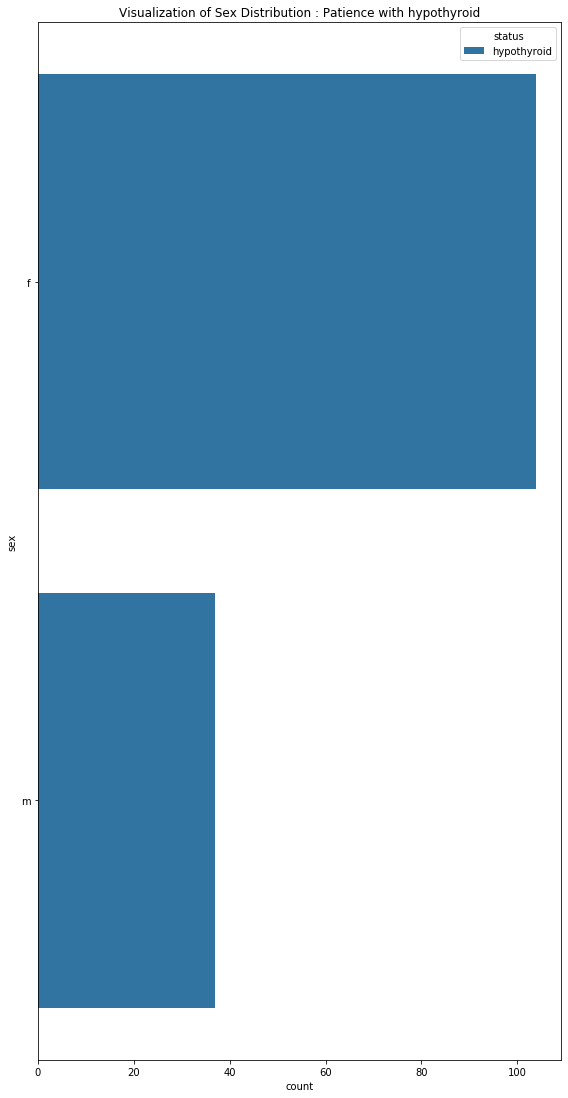

In [57]:
# visualizing sex distribution 
ax = plt.subplots(figsize=(8,15))
plt.tight_layout()
sns.countplot(y='sex',hue ='status',data=med).set_title('Visualization of Sex Distribution : Patience with hypothyroid');

In [36]:
# determining the range in which the patients are seen to have hypothyroid the most
medic = medz.groupby('age')
medic.count()

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
age,,,,,,,,,,,,,,,,,,,,,,,,,
5.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
15.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
16.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
17.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
22.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
27.0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


People at the age of 59 are seen to have the heighest recorded number of patients suffering from hypothyroidism

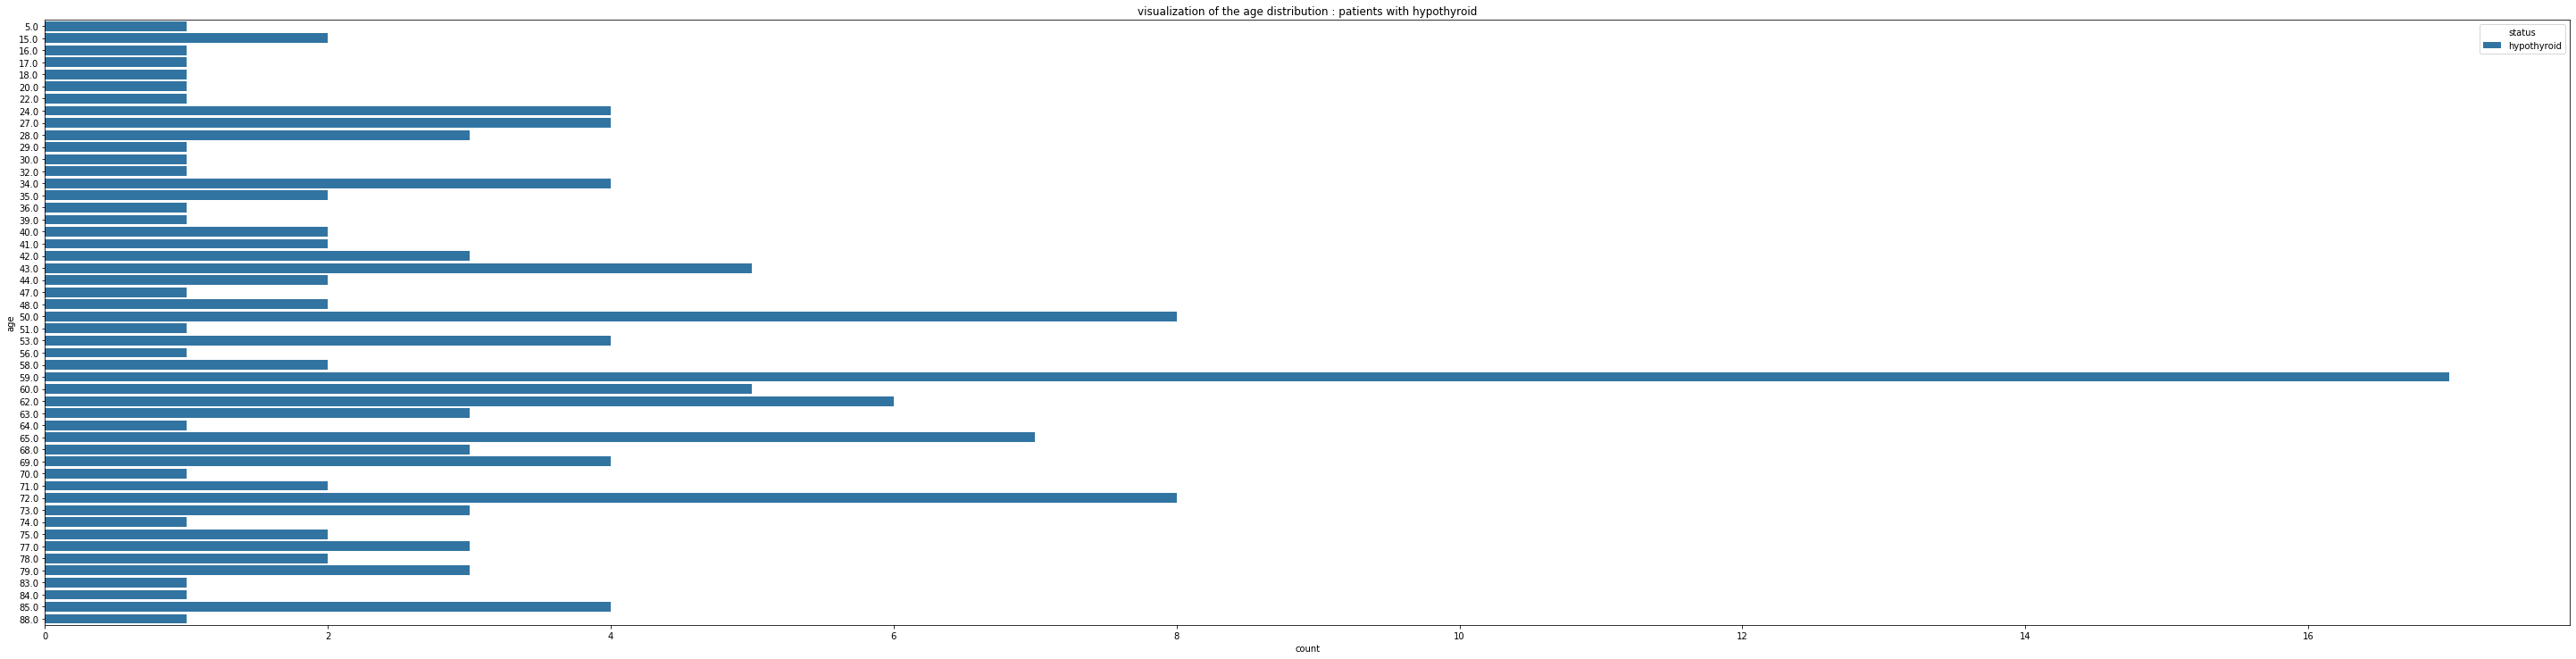

In [42]:
# visualizing the age distribution of patients with hypothyroid

ax = plt.subplots(figsize=(40,10))
plt.tight_layout()
sns.countplot(y='age',hue ='status',data=med).set_title('visualization of the age distribution : patients with hypothyroid');

Because it is not a normal distribution, it is safe to say that age has no effect, anyone can have an underactive thyroid 

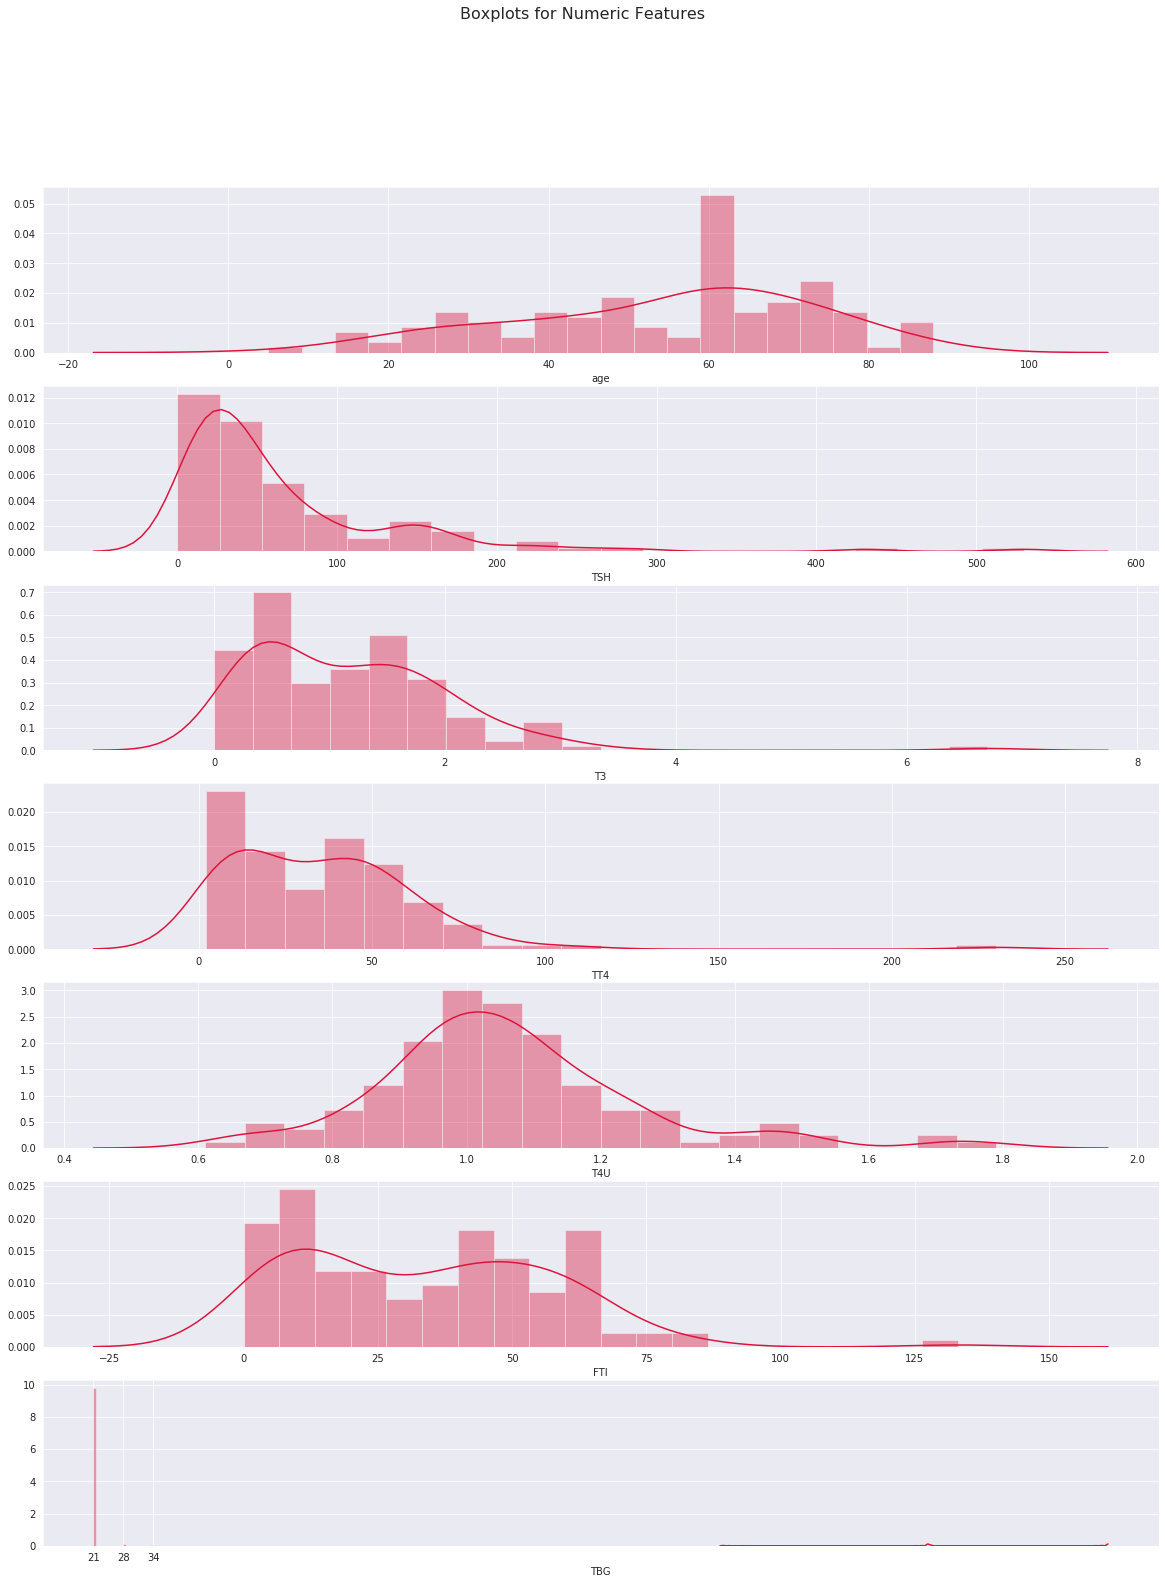

In [61]:
# Distribution Plots
#  plots to check for the distribution of the numeric features of our data

fig, axes = plt.subplots(nrows = 7, ncols = 1, figsize = (20, 25))

for ax, name, data in zip(axes.flatten(), numeric, med):
  sns.distplot(med[name], hist = True, ax = ax, bins = 20, color = 'crimson')
  plt.suptitle('Boxplots for Numeric Features', fontsize = 16)
  plt.subplots_adjust()

All numeric data other than age is skewed. Age is seen to be normally distributed

## Bivariate Analysis

The aim of bivariate analysis is to determine if a relationship exists between the given features of our data especially the between the dependent and independent variable

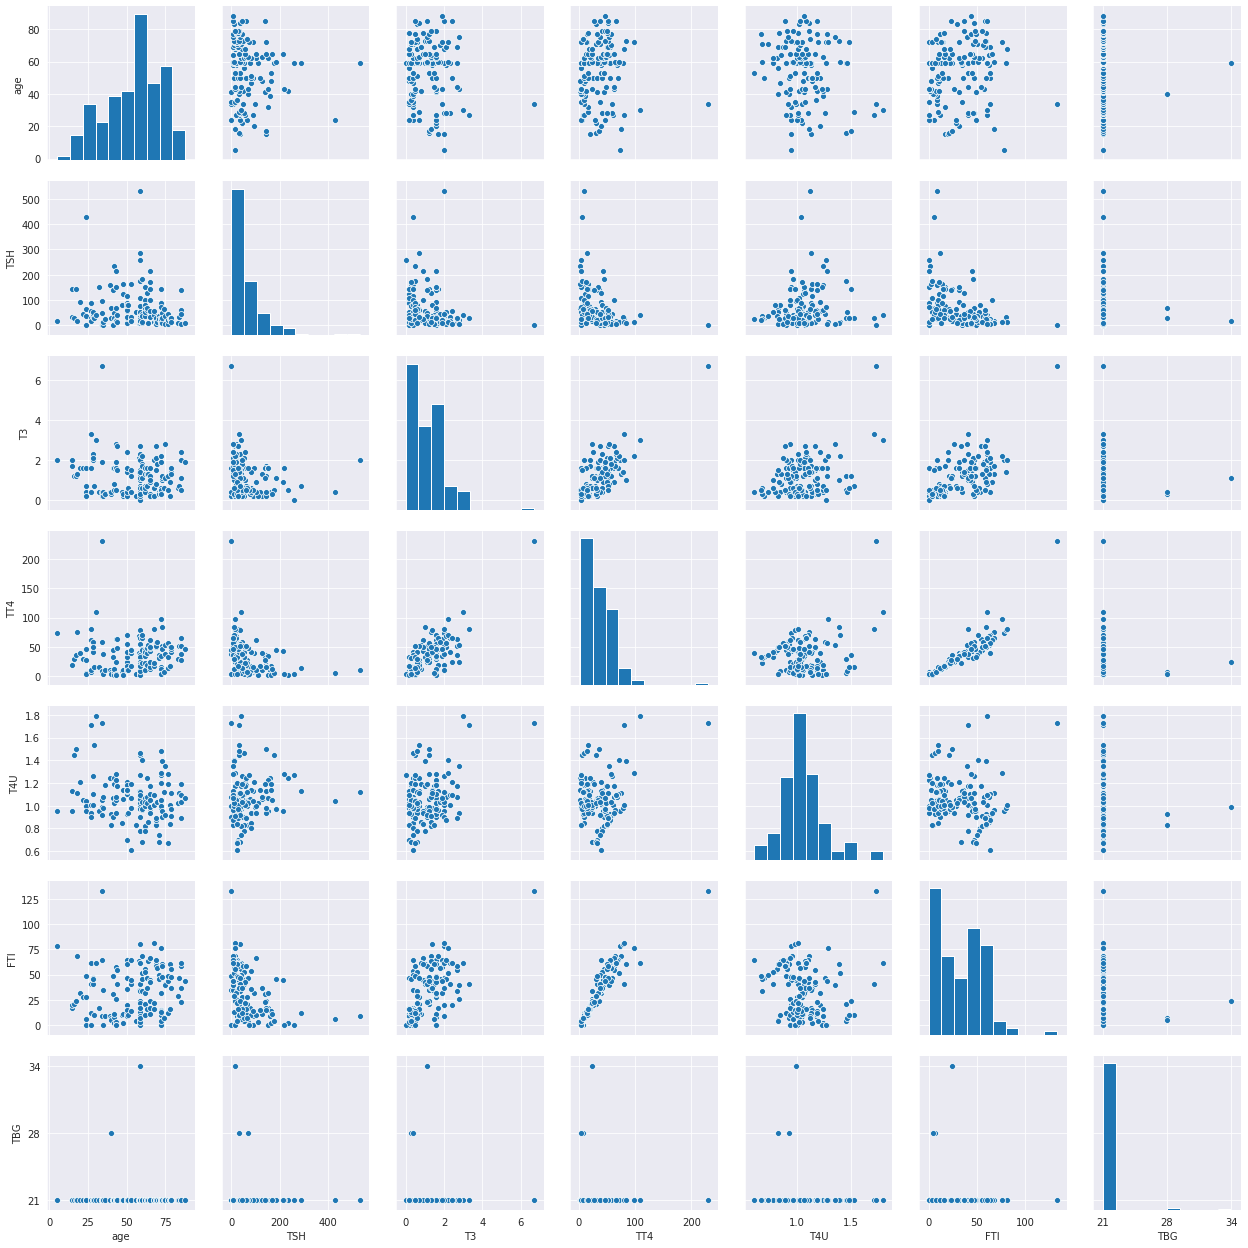

In [63]:
# Use of a pairplot to check for correlation between variables.

sns.pairplot(med, kind = 'scatter', dropna = False)
plt.tight_layout
plt.show()

In [64]:
# correlation between columns

corr=med.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,-0.112561,-0.127553,0.031302,-0.204360,0.138819
TSH,-0.112561,1.000000,-0.229180,-0.382031,0.116316,-0.434205
T3,-0.127553,-0.229180,1.000000,0.762113,0.354092,0.618319
TT4,0.031302,-0.382031,0.762113,1.000000,0.226720,0.917041
T4U,-0.204360,0.116316,0.354092,0.226720,1.000000,-0.109415
FTI,0.138819,-0.434205,0.618319,0.917041,-0.109415,1.000000


<function matplotlib.pyplot.show>

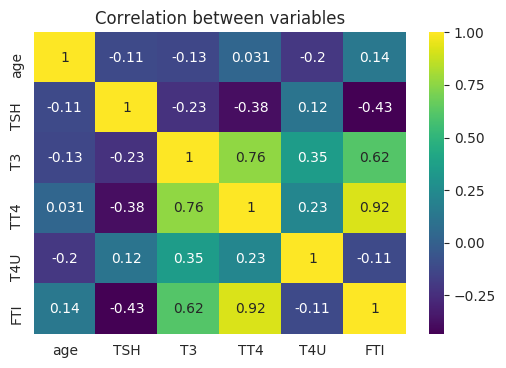

In [65]:
# visualizing the correlations between the variables
plt.figure(dpi=100)
corr=med.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True ,cmap='viridis')
plt.title('Correlation between variables')
plt.show

In [67]:
# description of the numerical data
med.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,141.0,54.397163,18.494740,5.00,42.00,59.00,69.00,88.00
TSH,141.0,65.187943,76.127739,0.00,20.00,38.00,80.00,530.00
T3,141.0,1.170213,0.885740,0.00,0.40,1.10,1.60,6.70
TT4,141.0,35.117730,28.350496,2.00,13.00,33.00,50.00,230.00
T4U,141.0,1.061915,0.197957,0.61,0.95,1.04,1.14,1.79
FTI,141.0,33.240426,23.693643,0.00,11.00,34.00,50.00,133.00


# Implimentation of the solution

## Random Forest

In [0]:
# more machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Encoding the categorical columns before fitting the data into the model

med= pd.get_dummies(med, columns = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                                 'thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick',
                                 'tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured',
                                 'FTI_measured','TBG_measured'] )


In [69]:
med.take(np.random.permutation(len(med))[:15])

,status,age,TSH,T3,TT4,T4U,FTI,TBG,sex_f,sex_m,on_thyroxine_f,on_thyroxine_t,query_on_thyroxine_f,on_antithyroid_medication_f,on_antithyroid_medication_t,thyroid_surgery_f,thyroid_surgery_t,query_hypothyroid_f,query_hypothyroid_t,query_hyperthyroid_f,query_hyperthyroid_t,pregnant_f,pregnant_t,sick_f,sick_t,tumor_f,lithium_f,goitre_f,goitre_t,TSH_measured_n,TSH_measured_y,T3_measured_n,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_n,TBG_measured_y
77,hypothyroid,72.0,11.0,0.3,13.0,1.00,13.0,21,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
102,hypothyroid,44.0,14.0,2.7,63.0,1.17,54.0,21,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
147,hypothyroid,69.0,6.6,1.5,50.0,0.83,60.0,21,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
141,hypothyroid,60.0,44.0,1.8,47.0,1.03,46.0,21,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
44,hypothyroid,59.0,35.0,1.4,78.0,0.98,80.0,21,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
26,hypothyroid,59.0,53.0,1.0,32.0,0.78,41.0,21,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
104,hypothyroid,43.0,16.0,1.9,63.0,1.08,57.0,21,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
150,hypothyroid,34.0,96.0,0.2,8.6,0.99,8.7,21,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
49,hypothyroid,32.0,150.0,0.4,16.0,0.95,17.0,21,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0
117,hypothyroid,18.0,16.0,1.3,75.0,1.11,68.0,21,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0


In [0]:
# Selecting the target and predictor variables
X = med.drop('status', axis = 1)

y = med.status

In [74]:
# Splitting the data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Modeling

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

comparison_frame = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

comparison_frame.head(10)

,Actual,Predicted
84,hypothyroid,hypothyroid
47,hypothyroid,hypothyroid
130,hypothyroid,hypothyroid
77,hypothyroid,hypothyroid
103,hypothyroid,hypothyroid
120,hypothyroid,hypothyroid
36,hypothyroid,hypothyroid
79,hypothyroid,hypothyroid
83,hypothyroid,hypothyroid
137,hypothyroid,hypothyroid


In [75]:
# Evaluating the model

# Assessing the errors
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [76]:
# get parameters 
forest.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [78]:
# Hyperparameter tuning the RandomForestClassifier

from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [40, 50, 60, 70, 80], 'min_samples_split':[2, 3, 6, 4, 5 ], 'max_depth' : [4, 5, 8, 10]}

forest = RandomForestClassifier()

search = GridSearchCV(forest, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 40}

In [79]:
# Fitting the model to best parameters obtained and observing the performance

forest = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', max_depth = 10, min_samples_split = 2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)


# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


I have a 100% accuracy which means my model is too perfect and will cause overfitting

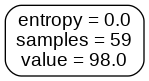

In [81]:
# Visualizing a tree from the random forest

dot_data = StringIO()

# Picking a specific tree from the forest
my_tree = forest.estimators_[2]

export_graphviz(my_tree, out_file = dot_data, filled = True, rounded = True,
              special_characters = True, feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

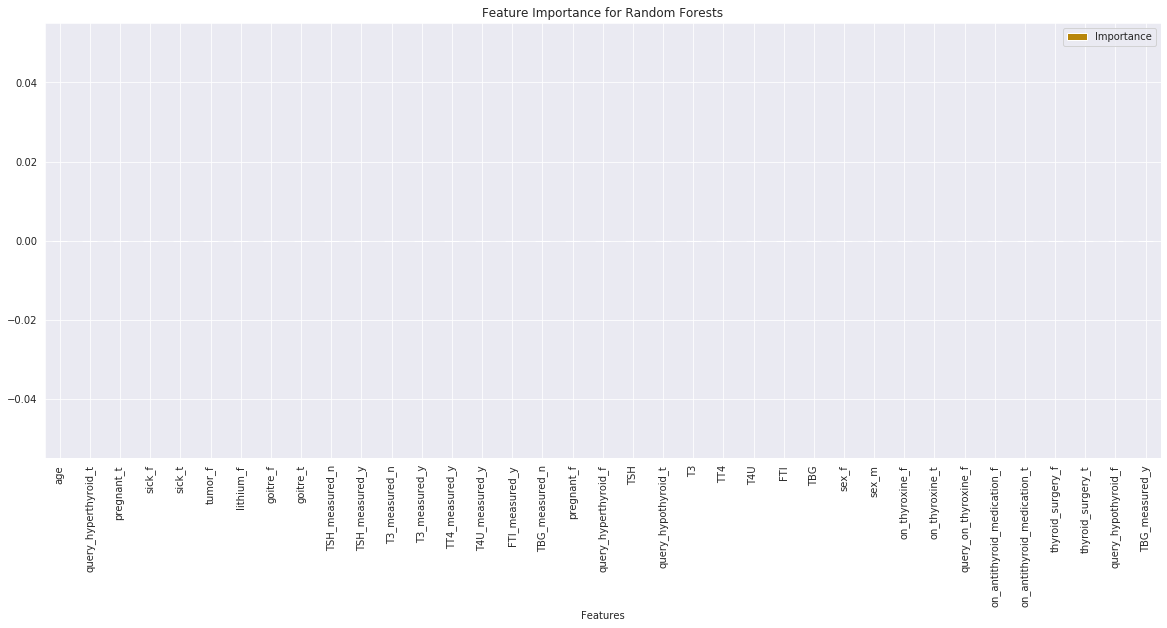

In [82]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'darkgoldenrod')
plt.show()

### AdaBoost trees

In [0]:
#Adaboost Trees

ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=300, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [85]:
# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 1.0


In [86]:
params = {'n_estimators' : [250, 300, 450, 500, 600]}

ada_boost = AdaBoostClassifier()

search = GridSearchCV(ada_boost, scoring = 'accuracy', param_grid = params, cv = 10)

search.fit(X, y)

search.best_params_

{'n_estimators': 250}

In [0]:
# using the suggested estimator
ada_boost = AdaBoostClassifier(RandomForestClassifier(max_depth = 4),
                          n_estimators=250, random_state = 0)

ada_boost = ada_boost.fit(X_train, y_train)
ada_pred = ada_boost.predict(X_test)

In [88]:
# Checking the accuracy of the prediction

print("Accuracy:", metrics.accuracy_score(y_test, ada_pred))

Accuracy: 1.0


**Feauture importance**

In [89]:
ada_boost.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

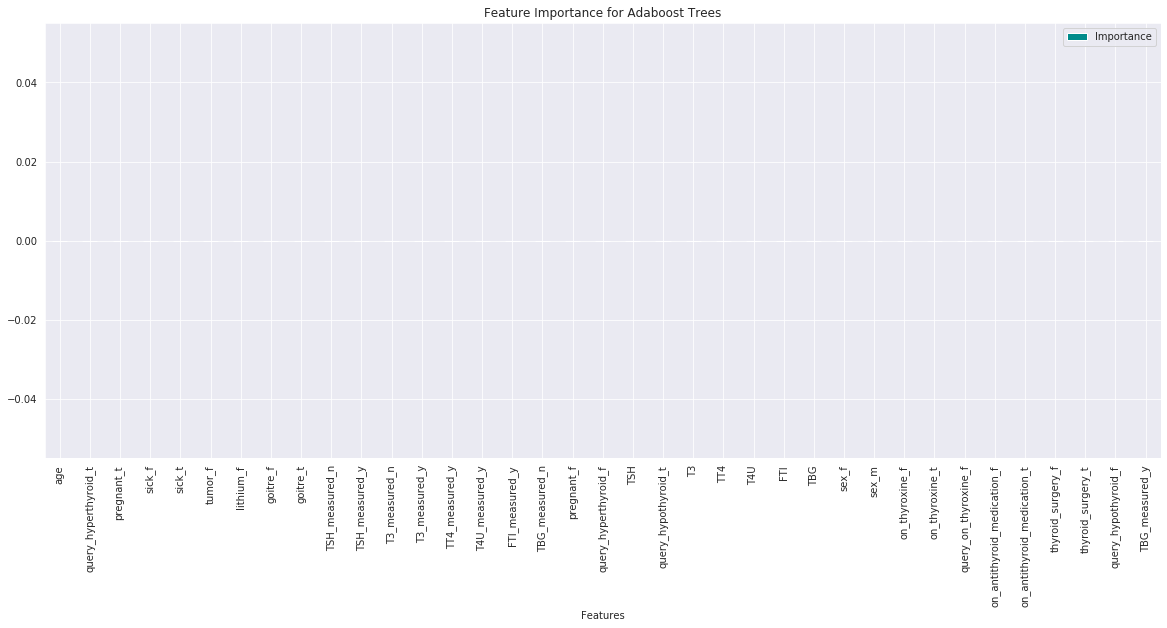

In [90]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : ada_boost.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Adaboost Trees',figsize = (20, 8), color = 'darkcyan')
plt.show()

## Support Vector Machine (svm)

In [91]:
# Selecting the independent variables and the target variable
#
X = med[['FTI', 'TSH']]
y = med['status']


# Defining the various SVM models to use for classification

pol = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names

model = [pol, linear, rbf]
names = ['Polynomial', 'Linear', 'RRBF']


# Creating a function that will fit the data and train it, predict using the test features and give an accuracy score for each model
# We will pass the model, the independent and dependent variables as our function parameters

def SVM(model, X, y):
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # Splitting the data into training and testing sets
  sc = StandardScaler()  # Standardising our data
  
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  model.fit(X_train, y_train) # Training the model and making predictions
  
  y_pred = model.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)# Evaluating the model performance
  
  return accuracy, model      # Promting the function to return the accuracy and the model name


for model, name in zip(model, names):
  print(f'The accuracy of {name:<10} is: {SVM(model, X, y)[0]}')

ValueError: ignored